In [1]:
#stting the tensorflow version
%tensorflow_version 1.15
import tensorflow as tf
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#importing all keras libraries that are required
from keras import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout, Input
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


'tf'

In [0]:
#declaring then name by postion
labels=['airplane','car','cat','dog','flower','fruit','motorbike','person']

In [0]:
#reading the All pictures with airplane data
import glob
import cv2
train_images=[]
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/natural_images/airplane/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (28,28))
    train_images.append([output,0])

In [0]:
#CARS
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/natural_images/car/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (28,28))
    train_images.append([output,1])    

In [0]:
#CATS
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/natural_images/cat/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (28,28))
    train_images.append([output,2])    

In [0]:
#DOGS
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/natural_images/dog/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (28,28))
    train_images.append([output,3])    

In [0]:
#FLOWERS
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/natural_images/flower/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (28,28))
    train_images.append([output,4])    

In [0]:
#FRUITS
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/natural_images/fruit/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (28,28))
    train_images.append([output,5])    

In [0]:
#MOTORBIKES
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/natural_images/motorbike/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (28,28))
    train_images.append([output,6])    

In [0]:
#PERSONS
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/natural_images/person/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (28,28))
    train_images.append([output,7])    

In [0]:
#SPLITIING THE DATA AND LABELS
x_DATA=[]
y_DATA=[]
for im,label in train_images:
  x.append(im)
  y.append(label)

In [0]:
COVERTING INOT NUMPY ARRAY AND RESIZING
x_DATA=np.array(x).reshape(-1,28,28,3)

In [0]:
#SPLITTING THE DATA USING train_test_split form sklearn
x_trains,x_tests,y_trains,y_tests=train_test_split(x_DATA,y,test_size=0.2, random_state=3)

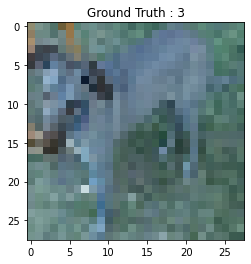

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x_trains[10,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(y_trains[10]))
plt.show()

In [0]:
#Normalizing the image by dividing each pixel value by 255
x_tests = x_tests.astype('float32')
x_trains = x_trains.astype('float32')
x_trains = x_trains / 255.0
x_tests = x_tests / 255.0
#onehot encoding the data
y_trains = np_utils.to_categorical(y_trains)
y_tests = np_utils.to_categorical(y_tests)
num_classes = y_tests.shape[1]

In [20]:
#Building the model
model = Sequential()
#using a conv2d layer with 3,3 filter with activation relu
model.add(Conv2D(64, (3, 3), input_shape=(x_train.shape[1:]), padding='same', activation='relu'))
#dropping out connections for less computational time
model.add(Dropout(0.5))
#using maxpooling with 2X2 filter
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
#flattening out as we the shape is change after maxpooling
model.add(Flatten())
#using softmax activation function for last layer inorder to claasify between 9 classes
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [0]:
#parameters
epochss = 10
#compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
#fitiing the model
his=model.fit(x_trains, y_trains, validation_data=(x_tests, y_tests), epochs=epochss, batch_size=54)

Train on 5519 samples, validate on 1380 samples
Epoch 1/10
5519/5519 [==============================] - 10s 2ms/step - loss: 0.1039 - accuracy: 0.9568 - val_loss: 0.1012 - val_accuracy: 0.9630
Epoch 2/10
5519/5519 [==============================] - 10s 2ms/step - loss: 0.1032 - accuracy: 0.9562 - val_loss: 0.0922 - val_accuracy: 0.9640
Epoch 3/10
5519/5519 [==============================] - 10s 2ms/step - loss: 0.0965 - accuracy: 0.9591 - val_loss: 0.0980 - val_accuracy: 0.9624
Epoch 4/10
5519/5519 [==============================] - 10s 2ms/step - loss: 0.0995 - accuracy: 0.9586 - val_loss: 0.0877 - val_accuracy: 0.9656
Epoch 5/10
5519/5519 [==============================] - 10s 2ms/step - loss: 0.0990 - accuracy: 0.9575 - val_loss: 0.0819 - val_accuracy: 0.9692
Epoch 6/10
5519/5519 [==============================] - 10s 2ms/step - loss: 0.0964 - accuracy: 0.9586 - val_loss: 0.0863 - val_accuracy: 0.9670
Epoch 7/10
5519/5519 [==============================] - 10s 2ms/step - loss: 0.089

In [28]:
#trying to predict an imge from test data
x12=model.predict_classes(x_tests[[21],:])
print(x12[0])
#printing the actual test label
print(y_testss[21])
#predicted labe
print(labels[x12[0]])

1
[0. 1. 0. 0. 0. 0. 0. 0.]
car


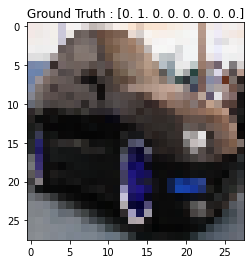

In [26]:
import matplotlib.pyplot as plt
plt.imshow(x_tests[21,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(y_tests[21]))
plt.show()

In [0]:
model.save("mod.h5")

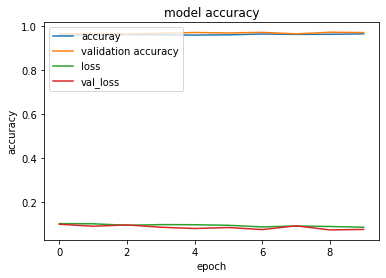

In [32]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()